In [79]:
%config

Available objects for config:
    AliasManager
    DisplayFormatter
    HistoryManager
    IPCompleter
    IPKernelApp
    LoggingMagics
    MagicsManager
    OSMagics
    PrefilterManager
    ScriptMagics
    StoreMagics
    ZMQInteractiveShell


In [177]:
#mm many additional "queries"
#aaa

import numpy as np

np.set_printoptions(threshold=20)
np.set_printoptions(threshold=400)
np.set_printoptions(threshold=40)

np.set_printoptions(edgeitems=10)

np.set_printoptions(precision=4)
np.set_printoptions(precision=3)
np.set_printoptions(precision=2)
#np.set_printoptions(precision=1)
#np.set_printoptions(precision=0)

%precision 4
%precision 3
%precision 2
#%precision 1


'%.2f'

# gensim

In [175]:
gensim.matutils.unitvec?
gensim.matutils.argsort(x, topn=None, reverse=False)?


SyntaxError: invalid syntax (416204676.py, line 2)

In [194]:
#import sklearn.feature_selection
#import sklearn.feature_extraction.text
import sklearn.linear_model
import sklearn.decomposition
sklearn.decomposition?
#sklearn.linear_model?



Type:        module
String form: <module 'sklearn.decomposition' from 'D:\\conda\\envs\\pip310ecco\\lib\\site-packages\\sklearn\\decomposition\\__init__.py'>
File:        d:\conda\envs\pip310ecco\lib\site-packages\sklearn\decomposition\__init__.py
Docstring:  
The :mod:`sklearn.decomposition` module includes matrix decomposition
algorithms, including among others PCA, NMF or ICA. Most of the algorithms of
this module can be regarded as dimensionality reduction techniques.

In [236]:
import numpy.linalg

#numpy.linalg.linalg?
#numpy.linalg?
#numpy.matlib?
#numpy.matrixlib?
#numpy.dual?

import scipy.linalg
#dir(scipy.linalg)

scipy.linalg?

#dir(scipy)

Type:        module
String form: <module 'scipy.linalg' from 'D:\\conda\\envs\\pip310ecco\\lib\\site-packages\\scipy\\linalg\\__init__.py'>
File:        d:\conda\envs\pip310ecco\lib\site-packages\scipy\linalg\__init__.py
Docstring:  
Linear algebra (:mod:`scipy.linalg`)

.. currentmodule:: scipy.linalg

Linear algebra functions.

.. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`

.. seealso::

   `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
   for more linear algebra functions. Note that
   although `scipy.linalg` imports most of them, identically named
   functions from `scipy.linalg` may offer more or slightly differing
   functionality.


Basics

.. autosummary::
   :toctree: generated/

   inv - Find the inverse of a square matrix
   solve - Solve a linear system of equations
   solve_banded - Solve a banded linear system
   solveh_banded - Solve a Hermitian or symmetric banded system
   solve_circulant - Solve a

# 01 - Exploring Word Embeddings
In this notebook, we'll look at trained word embeddings. We'll plot the embeddings so we can attempt to visually compare embeddings. We'll then look at analogies and word similarities. We'll use the Gensim library which makes it easy to work with embeddings.

In [35]:
import sklearn

In [59]:
import sklearn.metrics.pairwise

In [36]:
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [60]:
dir(sklearn.metrics.pairwise)

['ArgKmin',
 'DataConversionWarning',
 'KERNEL_PARAMS',
 'PAIRED_DISTANCES',
 'PAIRWISE_BOOLEAN_FUNCTIONS',
 'PAIRWISE_DISTANCE_FUNCTIONS',
 'PAIRWISE_KERNEL_FUNCTIONS',
 'Parallel',
 '_NAN_METRICS',
 '_VALID_METRICS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_argmin_min_reduce',
 '_argmin_reduce',
 '_check_chunk_size',
 '_chi2_kernel_fast',
 '_dist_wrapper',
 '_euclidean_distances',
 '_euclidean_distances_upcast',
 '_get_mask',
 '_num_samples',
 '_pairwise_callable',
 '_parallel_pairwise',
 '_precompute_metric_params',
 '_return_float_dtype',
 '_sparse_manhattan',
 'additive_chi2_kernel',
 'check_array',
 'check_non_negative',
 'check_paired_arrays',
 'check_pairwise_arrays',
 'chi2_kernel',
 'config_context',
 'cosine_distances',
 'cosine_similarity',
 'csr_matrix',
 'delayed',
 'distance',
 'distance_metrics',
 'effective_n_jobs',
 'euclidean_distances',
 'gen_batches',
 'gen_even_slices',
 'get_chunk_n_rows'

In [4]:
import gensim
import gensim.downloader as api

from gensim.models import KeyedVectors


from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore') #mm?

# Download a table of pre-trained embeddings

In [76]:
# https://huggingface.co/gpt2
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("gpt2")

trmodel = AutoModelForCausalLM.from_pretrained("gpt2")

In [54]:
# https://huggingface.co/fxmarty/tiny-testing-gpt2-remote-code

from transformers import AutoTokenizer, AutoModelWithLMHead   #,  TFAutoModel

tokenizer = AutoTokenizer.from_pretrained("fxmarty/tiny-testing-gpt2-remote-code")

####model = TFAutoModel.from_pretrained("fxmarty/tiny-testing-gpt2-remote-code" ) #  ,  from_pt=True)  
trmodel = AutoModelWithLMHead.from_pretrained("fxmarty/tiny-testing-gpt2-remote-code" ) #  ,  from_pt=True)  

D:\conda\envs\pip310ecco\lib\site-packages\transformers\models\auto\modeling_auto.py:1352: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [50]:
# https://huggingface.co/sshleifer/tiny-gpt2
from transformers import AutoTokenizer, AutoModelForCausalLM  #, TFAutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("sshleifer/tiny-gpt2")

trmodel =  AutoModelForCausalLM.from_pretrained("sshleifer/tiny-gpt2"  ) # ,  from_pt=True)

In [77]:
vectors =  trmodel.transformer.wte.weight.detach().numpy()
vectors.shape

(50257, 768)

In [78]:
model.add_vectors?


Signature: model.add_vectors(keys, weights, extras=None, replace=False)
Docstring:
Append keys and their vectors in a manual way.
If some key is already in the vocabulary, the old vector is kept unless `replace` flag is True.

Parameters
----------
keys : list of (str or int)
    Keys specified by string or int ids.
weights: list of numpy.ndarray or numpy.ndarray
    List of 1D np.array vectors or a 2D np.array of vectors.
replace: bool, optional
    Flag indicating whether to replace vectors for keys which already exist in the map;
    if True - replace vectors, otherwise - keep old vectors.
File:      d:\conda\envs\pip310ecco\lib\site-packages\gensim\models\keyedvectors.py
Type:      method

In [85]:
#model = KeyedVectors(32)
modelfromtr = KeyedVectors(vectors.shape[1])
type(model)

gensim.models.keyedvectors.KeyedVectors

In [86]:

vocab_dict = tokenizer.get_vocab()

vocab = [k for k, v in sorted(vocab_dict.items(), key=lambda x: x[1])]  #aaaa


In [87]:
vocab[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [88]:
#words = myarray[:,0]
#words = ['a','b']
words = vocab
#vectors = myarray[:,1:]
#vectors = np.random.randn(2,3)

In [196]:
modelfromtr.save?

Signature: modelfromtr.save(*args, **kwargs)
Docstring:
Save KeyedVectors to a file.

Parameters
----------
fname : str
    Path to the output file.

See Also
--------
:meth:`~gensim.models.keyedvectors.KeyedVectors.load`
    Load a previously saved model.
File:      d:\conda\envs\pip310ecco\lib\site-packages\gensim\models\keyedvectors.py
Type:      method

In [195]:
modelfromtr.add_vectors(words, vectors, replace=True)


NameError: name 'words' is not defined

In [111]:
#modelfromtr.save('d:/ai/mymodel.gensim')
#modelfromtr.save('c:/Users/marti/gensim-data/mymodel.gensim')

import json


# save the list to a file
#with open('my_list.json', 'w') as f:
    #json.dump(words, f)

# load the list from the file
#with open('my_list.json', 'r') as f:
    #my_loaded_list = json.load(f)



In [5]:
modelfromtr = KeyedVectors.load('c:/Users/marti/gensim-data/mymodel.gensim')

In [40]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [92]:
from gensim.models import Word2Vec

In [93]:
import os
from gensim.models import KeyedVectors
from gensim.downloader import base_dir


#def load_data():
path = os.path.join(base_dir, 'word2vec-google-news-300', "word2vec-google-news-300.gz")
#model = KeyedVectors.load_word2vec_format(path, binary=True)
path

'C:\\Users\\marti/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz'

In [8]:
modelwv = KeyedVectors.load_word2vec_format(path, binary=True, limit=10000)


In [67]:
# Download embeddings ( glove, trained on wikipedia)
model300 = api.load("glove-wiki-gigaword-300")

In [ ]:
model50 = api.load("glove-wiki-gigaword-50")

In [6]:
model=modelfromtr

In [9]:
model=modelwv

In [57]:
model=model50

In [69]:
model=model300

In [7]:
model['king'].shape

(768,)

In [11]:
#np.ndarray.base?
queen.base.shape

NameError: name 'queen' is not defined

In [193]:
model.vectors.shape

(50257, 768)

In [194]:
model.vectors.min()

-1.2698166

In [195]:
model.vectors.max()

1.7851565

In [196]:
#np.argsort?
np.argpartition?

Signature: np.argpartition(a, kth, axis=-1, kind='introselect', order=None)
Docstring:
Perform an indirect partition along the given axis using the
algorithm specified by the `kind` keyword. It returns an array of
indices of the same shape as `a` that index data along the given
axis in partitioned order.

.. versionadded:: 1.8.0

Parameters
----------
a : array_like
    Array to sort.
kth : int or sequence of ints
    Element index to partition by. The k-th element will be in its
    final sorted position and all smaller elements will be moved
    before it and all larger elements behind it. The order of all
    elements in the partitions is undefined. If provided with a
    sequence of k-th it will partition all of them into their sorted
    position at once.

    .. deprecated:: 1.22.0
        Passing booleans as index is deprecated.
axis : int or None, optional
    Axis along which to sort. The default is -1 (the last axis). If
    None, the flattened array is used.
kind : {'introse

In [197]:
np.argmin?

Signature: np.argmin(a, axis=None, out=None, *, keepdims=<no value>)
Docstring:
Returns the indices of the minimum values along an axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    By default, the index is into the flattened array, otherwise
    along the specified axis.
out : array, optional
    If provided, the result will be inserted into this array. It should
    be of the appropriate shape and dtype.
keepdims : bool, optional
    If this is set to True, the axes which are reduced are left
    in the result as dimensions with size one. With this option,
    the result will broadcast correctly against the array.

    .. versionadded:: 1.22.0

Returns
-------
index_array : ndarray of ints
    Array of indices into the array. It has the same shape as `a.shape`
    with the dimension along `axis` removed. If `keepdims` is set to True,
    then the size of `axis` will be 1 with the resulting array having same
    shape as `a.shape`.

See Also
--------

In [198]:
nvocab100=100
#nvocab100=-1

nvocab100=200


nvocab100=1000

#nvocab100=2000
#nvocab100=3000

#nvocab100=10000


In [207]:
model.vectors[:nvocab100].min(axis=0).argmax()

314

In [199]:
model.vectors[:nvocab100].max(axis=0).argmin()

36

In [200]:
np.argmin(model.vectors[:nvocab100].max(axis=0))

36

(array([ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,  3.,
         2.,  7.,  7.,  2., 14., 19., 36., 40., 55., 70., 93., 98., 82.,
        82., 42., 29., 12., 13.,  9.,  3.,  6.,  3.,  4.,  2.,  4.,  3.,
         3.,  1.,  2.,  3.,  1.,  1.,  2.,  0.,  3.,  1.,  1.]),
 array([-0.89, -0.87, -0.85, -0.83, -0.81, -0.78, -0.76, -0.74, -0.72,
        -0.7 , -0.68, -0.66, -0.63, -0.61, -0.59, -0.57, -0.55, -0.53,
        -0.51, -0.49, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.31, -0.29, -0.27, -0.25, -0.23, -0.21, -0.19, -0.17, -0.14,
        -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.01,  0.03,  0.05,
         0.07,  0.09,  0.11,  0.13,  0.15,  0.18]),
 <BarContainer object of 50 artists>)

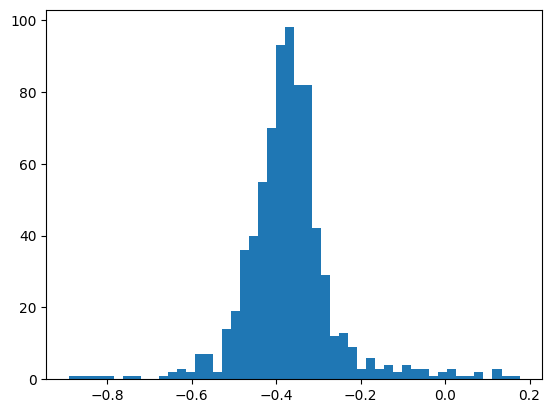

In [201]:
plt.hist(model.vectors[:nvocab100].min(axis=0), bins=50)

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  2.,
         1.,  2.,  2.,  3.,  3.,  1.,  4.,  3.,  2.,  6.,  4.,  5., 10.,
        11., 22., 32., 44., 72., 84., 95., 83., 84., 49., 54., 26., 19.,
        11., 10.,  4.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  2.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.13,
        -0.11, -0.09, -0.07, -0.05, -0.03, -0.01,  0.01,  0.03,  0.05,
         0.07,  0.09,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
         0.26,  0.28,  0.3 ,  0.32,  0.35,  0.37,  0.39,  0.41,  0.43,
         0.45,  0.47,  0.49,  0.51,  0.53,  0.55,  0.57,  0.6 ,  0.62,
         0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,
        

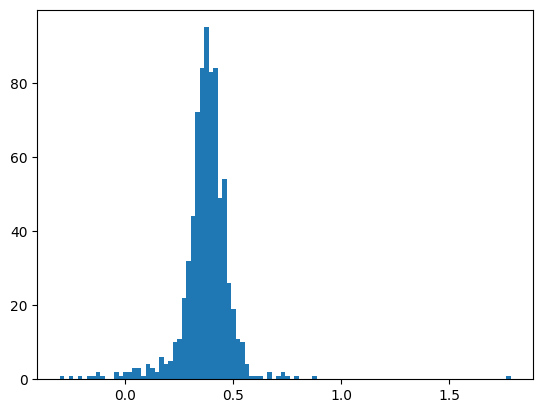

In [202]:
plt.hist(model.vectors[:nvocab100].max(axis=0),  bins=100)

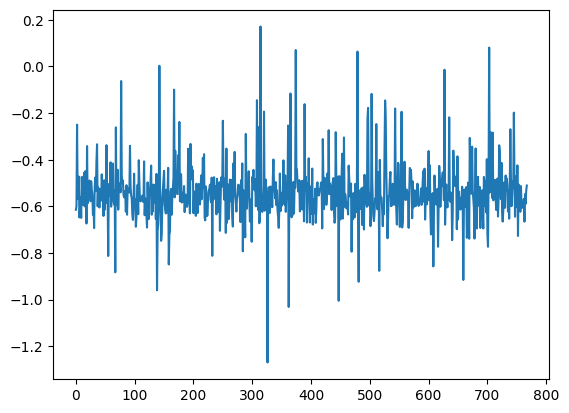

In [203]:
plt.plot(model.vectors.min(axis=0))

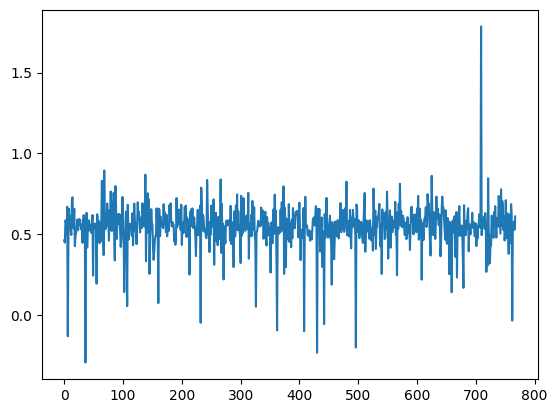

In [204]:
plt.plot(model.vectors.max(axis=0))

In [209]:
outli=np.zeros(model.vector_size)
#outli[276]=1
#outli[36]=1
outli[314]=1
#outli[275]=1
#outli[277]=1
#outli[1]=1
#model.most_similar(0*outli + model['the'] , topn=50)#
model.most_similar(outli , topn=150)

[('÷', 0.11),
 ('ĠRandomRedditor', 0.11),
 ('č', 0.11),
 ('ă', 0.11),
 ('ü', 0.11),
 ('ý', 0.11),
 ('Ğ', 0.11),
 ('ė', 0.11),
 ('embedreportprint', 0.11),
 ('Ĕ', 0.11),
 ('đ', 0.11),
 ('Ě', 0.11),
 ('Ă', 0.11),
 ('Ė', 0.11),
 ('Ą', 0.11),
 ('ā', 0.11),
 ('ć', 0.11),
 ('ę', 0.11),
 ('ù', 0.11),
 ('ĉ', 0.11),
 ('Ē', 0.11),
 ('ġ', 0.11),
 ('ğ', 0.11),
 ('Ę', 0.11),
 ('Ĝ', 0.11),
 ('ē', 0.11),
 ('ú', 0.11),
 ('ø', 0.11),
 ('Ď', 0.11),
 ('À', 0.11),
 ('Ĉ', 0.11),
 ('û', 0.11),
 ('ĠexternalToEVA', 0.11),
 ('ą', 0.11),
 ('Č', 0.11),
 ('InstoreAndOnline', 0.11),
 ('ĠTheNitrome', 0.11),
 ('rawdownload', 0.11),
 ('Đ', 0.11),
 ('ö', 0.11),
 ('ď', 0.11),
 ('ě', 0.11),
 ('ĝ', 0.11),
 ('Ā', 0.11),
 ('reportprint', 0.11),
 ('ĠãĤµãĥ¼ãĥĨãĤ£', 0.11),
 ('Ć', 0.11),
 ('quickShip', 0.11),
 ('ċ', 0.11),
 ('ĕ', 0.11),
 ('þ', 0.11),
 ('õ', 0.11),
 ('oreAndOnline', 0.11),
 ('é¾įå¥', 0.11),
 ('ÿ', 0.11),
 ('Á', 0.11),
 ('ĠexternalTo', 0.11),
 ('ÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤÃĥÃĤ', 

In [230]:
su=model.vectors[:75].max(axis=0)
su=model.vectors[:75].min(axis=0)
su=model.vectors[:75].mean(axis=0)
model.most_similar(su , topn=50)

[('The', 0.70),
 ('A', 0.70),
 ('2', 0.70),
 ('3', 0.69),
 ('1', 0.69),
 ('4', 0.69),
 ('In', 0.69),
 ('I', 0.69),
 ('F', 0.68),
 ('B', 0.68),
 ('5', 0.68),
 ('6', 0.67),
 ('C', 0.67),
 ('D', 0.67),
 ('7', 0.67),
 ('It', 0.67),
 ('8', 0.67),
 ('H', 0.66),
 ('.', 0.66),
 ('M', 0.66),
 ('P', 0.65),
 ('9', 0.65),
 ('R', 0.65),
 ('T', 0.65),
 ('L', 0.65),
 ('-', 0.65),
 ('"', 0.65),
 ('G', 0.65),
 ('This', 0.65),
 ('S', 0.64),
 ('E', 0.64),
 ('(', 0.64),
 ("'s", 0.64),
 ('/', 0.63),
 ('We', 0.63),
 ('An', 0.63),
 ('For', 0.63),
 ('V', 0.63),
 ('N', 0.63),
 ('_', 0.63),
 ('K', 0.63),
 ('If', 0.63),
 ('As', 0.63),
 ('W', 0.63),
 ('J', 0.62),
 (',', 0.62),
 ('0', 0.62),
 (';', 0.62),
 ('10', 0.62),
 ('Ġis', 0.62)]

# BUGS?  0 vs '0' ?

In [172]:
a=model[ ( [str(i)  for i in range(12)] )]

In [173]:
cosine_similarity(a)

array([[1.   , 0.62 , 0.623, 0.605, 0.569, 0.529, 0.534, 0.525, 0.485,
        0.486, 0.386, 0.368],
       [0.62 , 1.   , 0.928, 0.895, 0.868, 0.827, 0.807, 0.754, 0.758,
        0.716, 0.667, 0.568],
       [0.623, 0.928, 1.   , 0.97 , 0.932, 0.885, 0.866, 0.818, 0.808,
        0.764, 0.704, 0.62 ],
       [0.605, 0.895, 0.97 , 1.   , 0.966, 0.935, 0.921, 0.88 , 0.856,
        0.819, 0.742, 0.67 ],
       [0.569, 0.868, 0.932, 0.966, 1.   , 0.956, 0.959, 0.922, 0.914,
        0.873, 0.773, 0.71 ],
       [0.529, 0.827, 0.885, 0.935, 0.956, 1.   , 0.964, 0.949, 0.926,
        0.903, 0.834, 0.749],
       [0.534, 0.807, 0.866, 0.921, 0.959, 0.964, 1.   , 0.959, 0.948,
        0.918, 0.805, 0.765],
       [0.525, 0.754, 0.818, 0.88 , 0.922, 0.949, 0.959, 1.   , 0.949,
        0.952, 0.814, 0.811],
       [0.485, 0.758, 0.808, 0.856, 0.914, 0.926, 0.948, 0.949, 1.   ,
        0.951, 0.829, 0.794],
       [0.486, 0.716, 0.764, 0.819, 0.873, 0.903, 0.918, 0.952, 0.951,
        1.   , 0.809

In [70]:
#aaaa BUGS? restart ker? 0 vs '0' ?  #aaaa
b=model.vectors[:30]
print(b.shape)
for i in range(b.shape[0]):
    b[i] = model[str(i)] 
    #print(model[str(i)])
    print(i)
    print( model.most_similar( model[str(i)]   )  )    #
    #print( model.most_similar( str(i)   )  )

(30, 300)
0
[('0', 1.0), ('the', 1.0), ('2', 0.6232019066810608), ('1', 0.6204129457473755), ('3', 0.6051717400550842), ('4', 0.5690522193908691), ('0-0', 0.5614541172981262), ('1-0', 0.5503469705581665), ('1-1', 0.5383986830711365), ('6', 0.534415066242218)]
1
[(',', 1.5100178718566895), ('1', 0.9999999403953552), ('2', 0.9279310703277588), ('3', 0.8950024843215942), ('4', 0.8681426048278809), ('5', 0.826845109462738), ('6', 0.806555986404419), ('8', 0.7583443522453308), ('7', 0.7543156743049622), ('9', 0.715781569480896)]
2
[('.', 1.431396245956421), (',', 1.4011926651000977), ('2', 1.0), ('3', 0.9703841209411621), ('4', 0.9320957660675049), ('1', 0.9279311299324036), ('5', 0.8845053315162659), ('6', 0.8664985299110413), ('7', 0.8182485103607178), ('8', 0.8079200983047485)]
3
[('.', 1.3890042304992676), (',', 1.3514697551727295), ('of', 1.1291857957839966), ('3', 1.0), ('2', 0.9703841209411621), ('4', 0.966087281703949), ('5', 0.9347564578056335), ('6', 0.9210151433944702), ('1', 0.8

In [73]:
model.get_index('king')
model.get_index('man')
model.get_index('1')


176

In [78]:
model.index_to_key[:10]

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]

In [74]:
model.key_to_index

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [66]:
import math
x0=model['0']
x0x=model.vectors[15]
x16=model['16']
x16x=model.vectors[1433]
x0.dot(x16) /  x0.dot(x0)

model.vectors[:20].shape
print(x0.dot(x0) )
print(x0.dot(x16))
print(x0.dot(x0x))
print(x16.dot(x16))
print(x16x.dot(x16x))

print(model.vectors[16] @ model.vectors[16] )
print(model.vectors[16] @ model.vectors[1433] )

type(model.vectors)


print(max(abs(model.vectors[16] - model.vectors[1433] )))
print(max(abs(model.vectors[15] - model.vectors[0] )))
#(model.vectors[:17] @ x16) /  math.sqrt(x16 @ x16) /
print(cosine_similarity(model.vectors[:17], [x16]).T)
#cosine_similarity?
#model.vectors[:17].shape
#model.cosine_similarities?
print(model.cosine_similarities(model.vectors[15], model.vectors[:17] ))
print(model.cosine_similarities(x16, model.vectors[:17] ))

8.368047
6.904716
8.368047
8.550878
8.550878
8.550878
8.550878
0.0
0.0
[[0.82 1.   0.83 0.77 0.69 0.67 0.67 0.69 0.68 0.71 0.67 0.71 0.73 0.75
  0.8  0.82 1.  ]]
[1.   0.82 0.78 0.72 0.68 0.7  0.68 0.7  0.69 0.65 0.74 0.73 0.74 0.78
 0.82 1.   0.82]
[0.82 1.   0.83 0.77 0.69 0.67 0.67 0.69 0.68 0.71 0.67 0.71 0.73 0.75
 0.8  0.82 1.  ]


In [44]:
# BUGS?
b=model.vectors[:30]
print(b.shape)
for i in range(b.shape[0]):
    b[i] = model[str(i)] 
    #print(model[str(i)])
    print(i)
    print( model.most_similar( model[str(i)]   )  )    #
    #print( model.most_similar( str(i)   )  )

(30, 768)
0
[('15', 0.9999999403953552), ('!', 0.9427642226219177), ('0', 0.9314059615135193), ('1', 0.8263674378395081), ('16', 0.8162598013877869), ('14', 0.8155993819236755), ('2', 0.8110572695732117), ('17', 0.7816498279571533), ('13', 0.7774826884269714), ('.', 0.7517643570899963)]
1
[('1', 1.0123827457427979), ('16', 0.9999998211860657), ('"', 0.946315586566925), ('2', 0.8588055968284607), ('17', 0.8276669383049011), ('15', 0.8162597417831421), ('14', 0.7999317049980164), ('3', 0.7843351364135742), ('!', 0.769540548324585), ('18', 0.7659721970558167)]
2
[('2', 1.037622094154358), ('17', 0.9999999403953552), ('#', 0.841623842716217), ('3', 0.8394179940223694), ('1', 0.8379157185554504), ('16', 0.8276667594909668), ('18', 0.8197654485702515), ('14', 0.78741055727005), ('"', 0.7832340598106384), ('15', 0.7816498279571533)]
3
[('3', 1.0239733457565308), ('18', 0.9999999403953552), ('2', 0.8506068587303162), ('4', 0.8230723738670349), ('17', 0.8197654485702515), ('$', 0.80489861965179

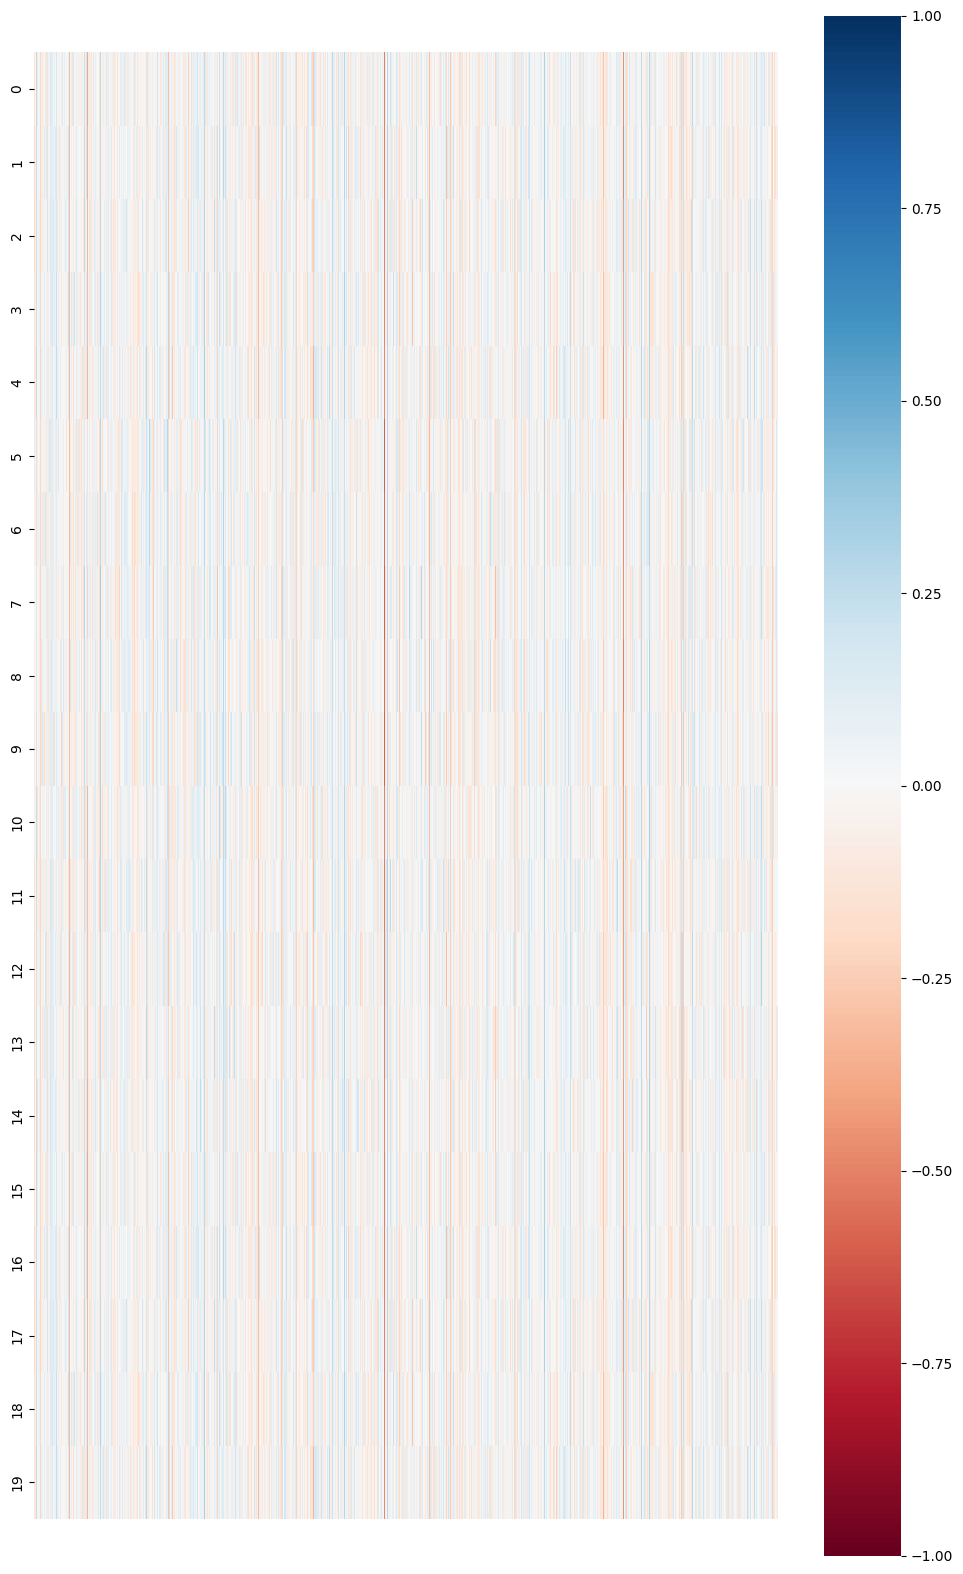

In [300]:
plot_embeddings(b)


# k m w q

In [98]:
#king=model['Ġking']
#man=model['Ġman']
#woman=model['Ġwoman']
##queen=model['queen']
#queen=model['Ġqueen']
##
key_or_keys=['king','man','woman','queen']
king,man,woman,queen = [model.get_vector(key,norm=True)   for key in key_or_keys]



#orig=model['anything']
#orig=model['anybody']

#person=model['Ġperson']
person=model['person']
#female=model['Ġfemale']
female=model['female']


In [99]:
a=np.column_stack((king,man,woman,queen,  king-man+woman ,  0.7*king+0.3*woman  ))
#a=np.column_stack((king,man,woman,queen,  king-man+woman ,  king+woman  ))
a.shape

(300, 6)

In [100]:
king.var()

0.00333227

In [250]:
queen.var()

0.018653743

In [102]:
from  scipy.stats import describe
##describe((queen, man))
describe(( man))

DescribeResult(nobs=300, minmax=(-0.3273869, 0.33340296), mean=0.0028004663, variance=0.0033366125556687047, skewness=0.12386993200207601, kurtosis=7.245568032563595)

(array([ 2.,  0.,  0.,  3.,  0.,  2.,  4.,  1.,  4.,  7.,  5., 13., 14.,
        15., 19., 22., 16., 23., 26., 13., 18., 22., 22., 12., 15.,  8.,
         2.,  3.,  3.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1 ,
        -0.09, ...,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,
         0.22,  0.23]),
 <BarContainer object of 40 artists>)

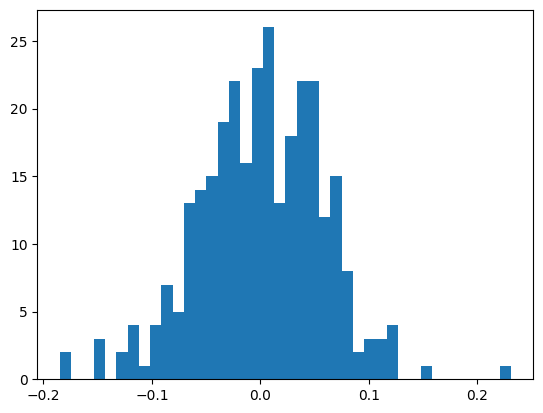

In [103]:
plt.hist(king , bins=40)

(array([ 3.,  1.,  1.,  0.,  0.,  2.,  5., 10., 16., 19., 19., 25., 31.,
        35., 36., 37., 45., 51., 46., 58., 55., 35., 45., 43., 34., 27.,
        19., 18., 24.,  7.,  9.,  6.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,
         1.]),
 array([-0.35, -0.33, -0.31, -0.29, -0.27, -0.26, -0.24, -0.22, -0.2 ,
        -0.18, -0.16, -0.15, -0.13, -0.11, -0.09, -0.07, -0.05, -0.03,
        -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.09,  0.11,  0.13,
         0.15,  0.17,  0.19,  0.21,  0.22,  0.24,  0.26,  0.28,  0.3 ,
         0.32,  0.33,  0.35,  0.37,  0.39]),
 <BarContainer object of 40 artists>)

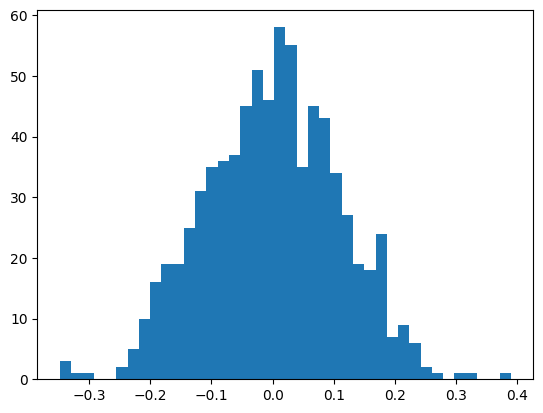

In [254]:
plt.hist(man , bins=40)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  2.,  7.,
        10., 18., 20., 24., 24., 39., 31., 25., 24., 23., 18., 12.,  3.,
         9.,  2.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-0.27, -0.25, -0.24, -0.23, -0.21, -0.2 , -0.18, -0.17, -0.16,
        -0.14, ...,  0.16,  0.18,  0.19,  0.21,  0.22,  0.23,  0.25,  0.26,
         0.28,  0.29]),
 <BarContainer object of 40 artists>)

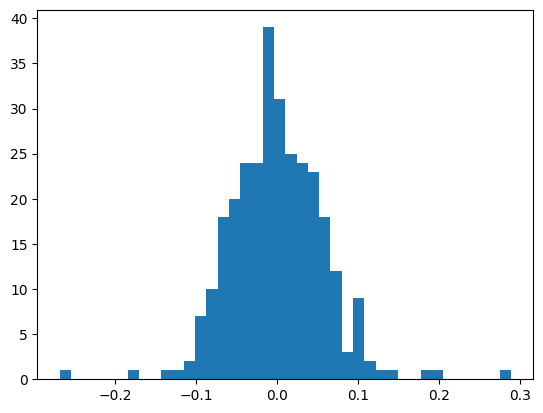

In [104]:
plt.hist(woman , bins=40)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  2.,  2.,  3.,
         5.,  1.,  5.,  6.,  7.,  4.,  7., 12., 10.,  8., 20., 13.,  7.,
        17., 20., 17., 13., 15., 23., 18., 31., 19., 19., 28., 24., 23.,
        20., 35., 19., 19., 12., 23., 17., 29., 26., 21., 12., 20., 15.,
        20., 15., 12., 12., 12., 10.,  8.,  5.,  4.,  5.,  0.,  2.,  2.,
         0.,  3.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([-0.44, -0.42, -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35,
        -0.33, -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25,
        -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.14,
        -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.05, -0.04,
        -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.04,  0.05,  0.06,
         0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.14,  0.15,  0.16,
         0.17,  0.18,  0.19,  0.2 ,  0.21,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.32,  0

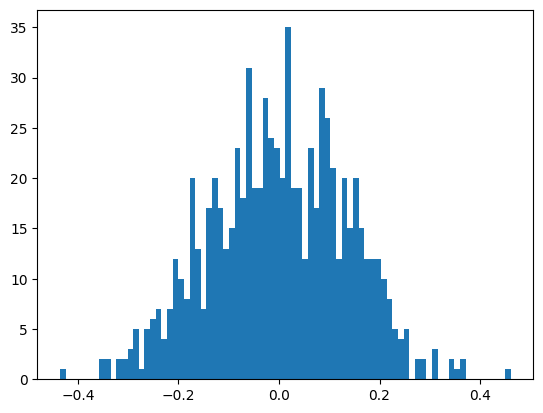

In [256]:
plt.hist(queen , bins=80)

In [257]:
y=np.arange(-2,2,0.1) // 1

In [258]:

def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()
    
    #sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)     #aaaa  vmax=2, vmin=-2,
    sns.heatmap(vectors, cmap='RdBu', vmax=1, vmin=-1, ax=ax)     #aaaa  vmax=2, vmin=-2,
    
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

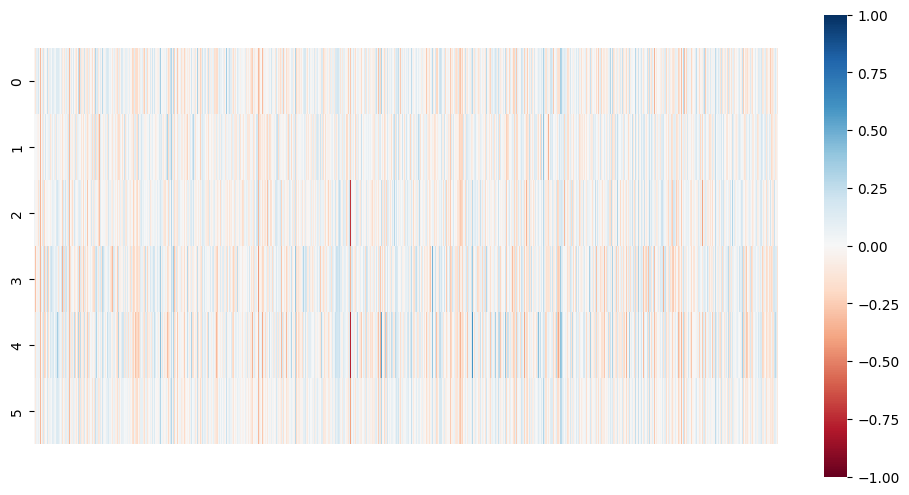

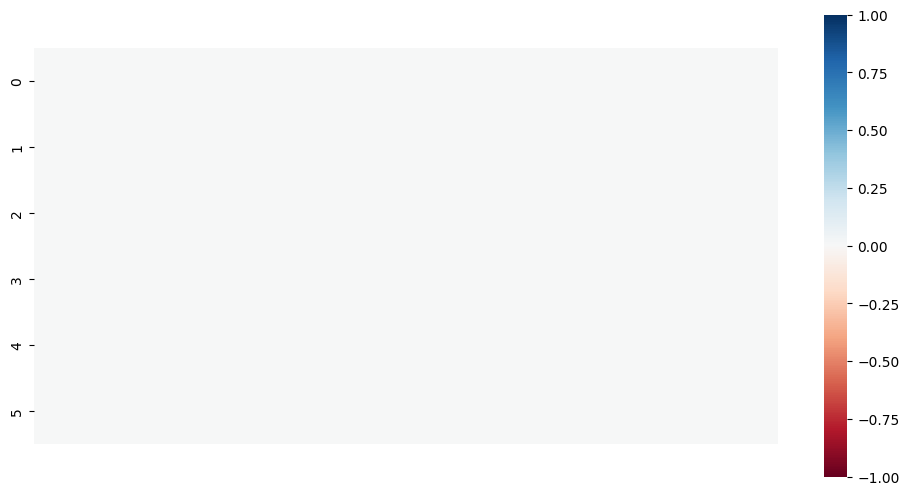

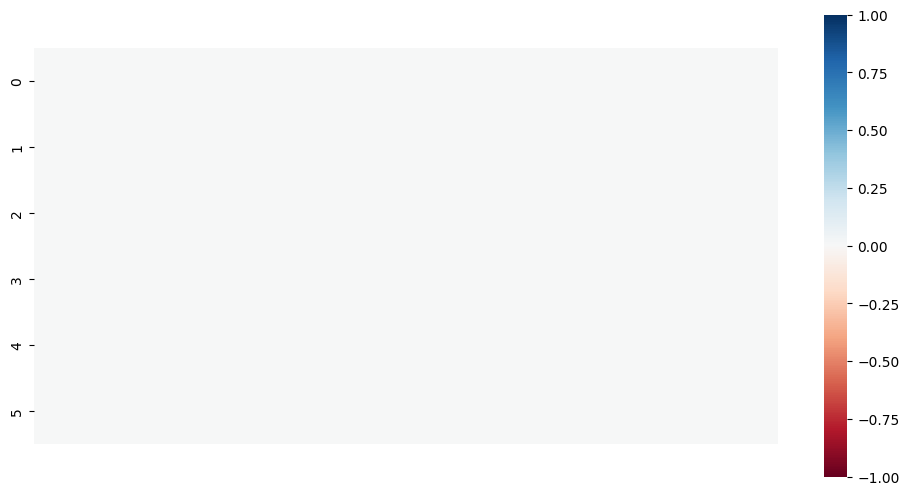

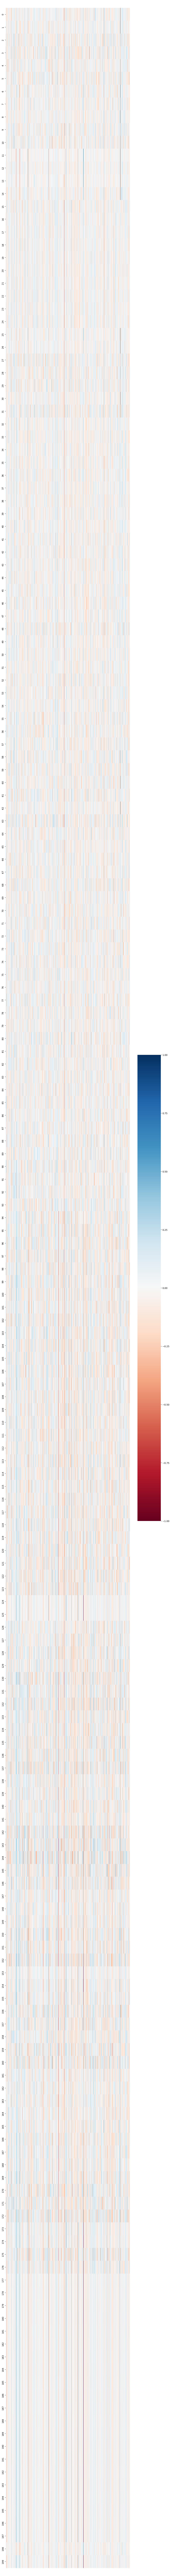

0 !
1 "
2 #
3 $
4 %
5 &
6 '
7 (
8 )
9 *
10 +
11 ,
12 -
13 .
14 /
15 0
16 1
17 2
18 3
19 4
20 5
21 6
22 7
23 8
24 9
25 :
26 ;
27 <
28 =
29 >
30 ?
31 @
32 A
33 B
34 C
35 D
36 E
37 F
38 G
39 H
40 I
41 J
42 K
43 L
44 M
45 N
46 O
47 P
48 Q
49 R
50 S
51 T
52 U
53 V
54 W
55 X
56 Y
57 Z
58 [
59 \
60 ]
61 ^
62 _
63 `
64 a
65 b
66 c
67 d
68 e
69 f
70 g
71 h
72 i
73 j
74 k
75 l
76 m
77 n
78 o
79 p
80 q
81 r
82 s
83 t
84 u
85 v
86 w
87 x
88 y
89 z
90 {
91 |
92 }
93 ~
94 ¡
95 ¢
96 £
97 ¤
98 ¥
99 ¦
100 §
101 ¨
102 ©
103 ª
104 «
105 ¬
106 ®
107 ¯
108 °
109 ±
110 ²
111 ³
112 ´
113 µ
114 ¶
115 ·
116 ¸
117 ¹
118 º
119 »
120 ¼
121 ½
122 ¾
123 ¿
124 À
125 Á
126 Â
127 Ã
128 Ä
129 Å
130 Æ
131 Ç
132 È
133 É
134 Ê
135 Ë
136 Ì
137 Í
138 Î
139 Ï
140 Ð
141 Ñ
142 Ò
143 Ó
144 Ô
145 Õ
146 Ö
147 ×
148 Ø
149 Ù
150 Ú
151 Û
152 Ü
153 Ý
154 Þ
155 ß
156 à
157 á
158 â
159 ã
160 ä
161 å
162 æ
163 ç
164 è
165 é
166 ê
167 ë
168 ì
169 í
170 î
171 ï
172 ð
173 ñ
174 ò
175 ó
176 ô
177 õ
178 ö
179 ÷
180 ø
181 ù
182 ú
183 û
184 ü


In [259]:
###plt.imshow(y.T)
#plt.imshow(a)
#sns.heatmap(a)
plot_embeddings(a.T)
plot_embeddings(a.T>1)
plot_embeddings(a.T< -1)

plot_embeddings(model.vectors[:200, :])
for i,x in enumerate( words[:200] ):
    print(i,x)

In [105]:
((queen+1.1)//1)  

array([0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 2., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 2., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 2., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1.

In [110]:
0+(queen>=1.0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
0+(queen <= -0.9)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [148]:
print(queen.fo )

[-2.2e-01  6.5e-02 -8.6e-02  5.1e-01  3.3e-01 -1.3e-01  8.3e-02  9.2e-02
 -3.1e-01 -9.4e-01 -8.9e-02 -1.1e-01  2.1e-01  7.0e-01  2.7e-01 -4.0e-02
  1.7e-01 -3.1e-01 -5.2e-02 -1.8e-01 -8.4e-01  1.9e-01 -1.4e-01  3.9e-01
  2.7e-01 -1.7e-01 -4.7e-01 -2.5e-02  9.7e-02  3.0e-01  1.8e-01 -6.9e-02
 -2.0e-01  3.6e-01 -2.8e-01  2.8e-01 -1.2e-02  1.1e-01 -2.4e-01 -1.8e-01
 -1.3e-01 -1.7e-01 -5.9e-01  9.6e-01  2.0e-01 -4.3e-02  6.1e-01 -6.9e-02
  5.2e-01 -5.5e-01 -5.5e-01  4.3e-01  4.5e-01 -2.6e-02 -1.2e-01 -1.9e-01
  3.6e-01 -2.5e-01  7.2e-01 -5.8e-02  3.4e-01  4.7e-01  2.0e-01  7.0e-01
  4.9e-01 -9.0e-01 -1.0e-01  1.3e-01 -4.1e-01  4.0e-01  9.6e-02  3.3e-01
  7.0e-02 -2.0e-01  1.6e-01  9.7e-02  5.6e-01 -5.5e-01  9.2e-02  2.3e-01
  3.9e-01 -1.1e-01  1.1e-01 -2.6e-01  5.6e-01 -5.4e-01  1.0e-01 -3.3e-02
  1.1e-01 -4.5e-01  2.3e-01 -4.2e-01  8.0e-02 -4.4e-01 -2.0e-01 -4.2e-01
  5.3e-01 -1.3e-01 -4.8e-02 -5.6e-01  2.7e-01 -3.6e-01  3.9e-01  6.4e-02
  2.0e-01  4.3e-01  6.0e-02  1.1e-01  5.0e-02  2.9e

In [ ]:
np.ndarray.fo

In [144]:
for i in np.printoptions():
    print(i)

TypeError: '_GeneratorContextManager' object is not iterable

In [147]:
#$np.sort(queen).tolist()

[-0.9,
 -0.9,
 -0.9,
 -0.9,
 -0.9,
 -0.8,
 -0.8,
 -0.8,
 -0.8,
 -0.7,
 -0.7,
 -0.7,
 -0.7,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.6,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.3,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.2,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.1,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,

In [42]:
type(queen)

numpy.ndarray

In [45]:
np.sort?

Signature: np.sort(a, axis=-1, kind=None, order=None)
Docstring:
Return a sorted copy of an array.

Parameters
----------
a : array_like
    Array to be sorted.
axis : int or None, optional
    Axis along which to sort. If None, the array is flattened before
    sorting. The default is -1, which sorts along the last axis.
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
    Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
    and 'mergesort' use timsort or radix sort under the covers and, in general,
    the actual implementation will vary with data type. The 'mergesort' option
    is retained for backwards compatibility.

    .. versionchanged:: 1.15.0.
       The 'stable' option was added.

order : str or list of str, optional
    When `a` is an array with fields defined, this argument specifies
    which fields to compare first, second, etc.  A single field can
    be specified as a string, and not all fields need be specified,
    but unspecif

# subspace: 0 m k w q

In [191]:
key_or_keys=[  'man',   'king','woman','queen']
key_or_keys=[     'king','man'   ,'woman','queen']
#key=key_or_keys[1]
#a=np.vstack([model.get_vector(key,norm=True)   for key in key_or_keys])
ab=np.column_stack([model.get_vector(key,norm=True)   for key in key_or_keys])
#ab=np.column_stack([model.get_vector(key,norm=False)   for key in key_or_keys])


In [192]:
q,r=np.linalg.qr(ab)
#q,r=np.linalg.qr(a.T)
q,r
r.round(2)

array([[-1.  , -0.33, -0.22, -0.63],
       [ 0.  ,  0.94,  0.66,  0.01],
       [ 0.  ,  0.  ,  0.71,  0.32],
       [ 0.  ,  0.  ,  0.  , -0.7 ]], dtype=float32)

## old

In [129]:
kingalongman = man * np.dot(king,man)
womanalongman = man * np.dot(woman,man)
queenalongman =  man * np.dot(queen,man)

kingperpman = king - kingalongman
womanperpman= woman-womanalongman
queenperpman= queen - queenalongman

model.most_similar(kingperpman)
#model.most_similar(kingalongman)

model.most_similar(womanperpman)
model.most_similar(queenperpman)

[('queen', 0.975),
 ('elizabeth', 0.662),
 ('princess', 0.610),
 ('king', 0.574),
 ('monarch', 0.552),
 ('majesty', 0.531),
 ('royal', 0.522),
 ('victoria', 0.512),
 ('margrethe', 0.504),
 ('coronation', 0.502)]

In [113]:
np.dot(kingalongman, kingalongman)

0.110980414

In [130]:
np.linalg.norm(kingalongman)
np.linalg.norm(kingperpman)
np.linalg.norm(womanperpman)
np.linalg.norm(queenperpman)



0.97457045

In [131]:
np.dot(kingperpman, womanperpman)

-0.010953739

In [133]:
cosine_similarity(womanperpman.reshape(1, -1), kingperpman.reshape(1, -1))
cosine_similarity(queenperpman.reshape(1, -1), kingperpman.reshape(1, -1))



array([[0.608]], dtype=float32)

In [141]:
qpem_a_kpem = kingperpman* cosine_similarity(queenperpman.reshape(1, -1), kingperpman.reshape(1, -1))
np.linalg.norm(qpem_a_kpem)
model.most_similar(qpem_a_kpem)

[('king', 0.943),
 ('queen', 0.593),
 ('monarch', 0.557),
 ('prince', 0.555),
 ('kingdom', 0.551),
 ('throne', 0.540),
 ('iii', 0.537),
 ('ii', 0.513),
 ('vi', 0.503),
 ('kings', 0.494)]

In [142]:
qpem_p_kpem= queenperpman - qpem_a_kpem
np.linalg.norm(qpem_p_kpem)
model.most_similar(qpem_p_kpem)

[('queen', 0.788),
 ('elizabeth', 0.555),
 ('victoria', 0.487),
 ('princess', 0.471),
 ('margrethe', 0.462),
 ('lady', 0.450),
 ('latifah', 0.448),
 ('anne-style', 0.428),
 ('mary', 0.410),
 ('beatrix', 0.407)]

In [136]:
cosine_similarity(qpem_p_kpem.reshape(1, -1), womanperpman.reshape(1, -1))



array([[0.413]], dtype=float32)

In [144]:
# qres=qpem_p_kpem - womanperpman*cosine_similarity(qpem_p_kpem.reshape(1, -1), womanperpman.reshape(1, -1))
np.linalg.norm(qres)
model.most_similar(qres)

[('queen', 0.735),
 ('elizabeth', 0.487),
 ('victoria', 0.465),
 ('anne-style', 0.432),
 ('latifah', 0.420),
 ('margrethe', 0.414),
 ('jubilee', 0.400),
 ('beatrix', 0.397),
 ('tiye', 0.383),
 ('buckingham', 0.382)]

# degrees of similarity, restrict_vocab=...

In [167]:
model.get_index('0')

1343

In [168]:
model.most_similar( ['the'] , topn=50) #, restrict_vocab=1000,topn=50)   #[-56:]

[('0', 1.000),
 (',', 0.937),
 ('.', 0.892),
 ('of', 0.683),
 ('and', 0.638),
 ('2', 0.623),
 ('1', 0.620),
 ('3', 0.605),
 ('in', 0.598),
 ('to', 0.578),
 ('4', 0.569),
 ('0-0', 0.561),
 ('1-0', 0.550),
 ('1-1', 0.538),
 ('6', 0.534),
 ('2-2', 0.532),
 ('5', 0.529),
 ('7', 0.525),
 ('3-0', 0.512),
 ('2-0', 0.511),
 ('2-1', 0.507),
 ('=', 0.499),
 ('3-1', 0.497),
 ('a', 0.495),
 ('0-1', 0.487),
 ('vs.', 0.487),
 ('aggregate', 0.487),
 ('9', 0.486),
 ('8', 0.485),
 ('v', 0.479),
 ('4-0', 0.473),
 ('3-2', 0.471),
 ('0-2', 0.471),
 ('–', 0.468),
 ('0-3', 0.462),
 ('4-1', 0.461),
 ('b', 0.456),
 ("'s", 0.447),
 ('4-2', 0.444),
 ('1-3', 0.437),
 ('5-0', 0.437),
 ('3-3', 0.436),
 ('c', 0.433),
 ('g', 0.432),
 ('"', 0.429),
 ('>', 0.427),
 ('vs', 0.423),
 ('1-2', 0.421),
 ('0-4', 0.418),
 ('5-1', 0.413)]

In [160]:
model.most_similar(woman , topn=50) #, restrict_vocab=1000,topn=50)   #[-56:]

[('woman', 1.000),
 ('girl', 0.730),
 ('man', 0.700),
 ('mother', 0.690),
 ('she', 0.643),
 ('her', 0.633),
 ('female', 0.625),
 ('herself', 0.622),
 ('person', 0.617),
 ('women', 0.605),
 ('wife', 0.599),
 ('daughter', 0.571),
 ('pregnant', 0.560),
 ('victim', 0.553),
 ('husband', 0.546),
 ('boy', 0.545),
 ('teenager', 0.544),
 ('child', 0.534),
 ('girlfriend', 0.533),
 ('grandmother', 0.529),
 ('another', 0.529),
 ('who', 0.528),
 ('male', 0.528),
 ('old', 0.523),
 ('young', 0.520),
 ('someone', 0.516),
 ('couple', 0.507),
 ('one', 0.498),
 ('worker', 0.496),
 ('elderly', 0.490),
 ('actress', 0.486),
 ('men', 0.484),
 ('prostitute', 0.482),
 ('lover', 0.480),
 ('beautiful', 0.480),
 ('soldier', 0.474),
 ('life', 0.474),
 ('housewife', 0.473),
 ('doctor', 0.469),
 ('lady', 0.468),
 ('girls', 0.466),
 ('dead', 0.465),
 ('baby', 0.464),
 ('sister', 0.461),
 ('teenage', 0.457),
 ('policeman', 0.456),
 ('father', 0.454),
 ('wearing', 0.453),
 ('dressed', 0.452),
 ('first', 0.452)]

In [161]:
model.most_similar(queen, topn=150 ) # restrict_vocab=10500 11150)[-56:]

[('queen', 1.000),
 ('elizabeth', 0.677),
 ('princess', 0.636),
 ('king', 0.634),
 ('monarch', 0.581),
 ('royal', 0.543),
 ('majesty', 0.535),
 ('victoria', 0.524),
 ('throne', 0.510),
 ('lady', 0.505),
 ('crown', 0.500),
 ('consort', 0.496),
 ('mary', 0.490),
 ('prince', 0.487),
 ('coronation', 0.485),
 ('empress', 0.481),
 ('duchess', 0.476),
 ('anne', 0.475),
 ('ii', 0.474),
 ('mother', 0.462),
 ('margrethe', 0.459),
 ('daughter', 0.458),
 ('wife', 0.457),
 ('isabella', 0.456),
 ('palace', 0.451),
 ('latifah', 0.449),
 ('dowager', 0.448),
 ('buckingham', 0.448),
 ('crowned', 0.445),
 ('beatrix', 0.443),
 ('sister', 0.439),
 ('vi', 0.434),
 ('margaret', 0.430),
 ('jubilee', 0.428),
 ('her', 0.428),
 ('rania', 0.421),
 ('she', 0.410),
 ('grandmother', 0.409),
 ('queens', 0.408),
 ('windsor', 0.406),
 ('sirikit', 0.406),
 ('kingdom', 0.405),
 ('knighted', 0.404),
 ('widow', 0.404),
 ('countess', 0.403),
 ('honour', 0.402),
 ('regent', 0.401),
 ('emperor', 0.400),
 ('wedding', 0.399),
 

# cosine_similarity

In [58]:
# testonly 
a= np.array(  [[1,0],  [1,1]   ,[0,1],[-1,0], [0,-1]]  ).T

In [33]:
np.column_stack?

Signature: np.column_stack(tup)
Docstring:
Stack 1-D arrays as columns into a 2-D array.

Take a sequence of 1-D arrays and stack them as columns
to make a single 2-D array. 2-D arrays are stacked as-is,
just like with `hstack`.  1-D arrays are turned into 2-D columns
first.

Parameters
----------
tup : sequence of 1-D or 2-D arrays.
    Arrays to stack. All of them must have the same first dimension.

Returns
-------
stacked : 2-D array
    The array formed by stacking the given arrays.

See Also
--------
stack, hstack, vstack, concatenate

Examples
--------
>>> a = np.array((1,2,3))
>>> b = np.array((2,3,4))
>>> np.column_stack((a,b))
array([[1, 2],
       [2, 3],
       [3, 4]])
File:      d:\conda\envs\pip310ecco\lib\site-packages\numpy\lib\shape_base.py
Type:      function

In [90]:
key_or_keys=['king','man','woman','queen']
#key=key_or_keys[1]
#a=np.vstack([model.get_vector(key,norm=True)   for key in key_or_keys])
a=np.column_stack([model.get_vector(key,norm=True)   for key in key_or_keys])


In [175]:
a=np.column_stack((king,man,woman,queen,  king-man+woman ,  0.7*king+0.3*woman  ))
#a=np.column_stack((king,man,woman,queen,  king-man+woman ,  king+woman  ))
#aaa
np.linalg.norm(a, axis=0)

#a.shape

array([1.   , 1.   , 1.   , 1.   , 1.174, 0.821], dtype=float32)

In [178]:
print(a.shape)
aa=a.T @ a
aa[:2, :2]

(300, 6)


array([[1.  , 0.33],
       [0.33, 1.  ]], dtype=float32)

In [107]:
cosine_similarity(a.T)

array([[1.  , 0.33, 0.22, 0.63, 0.76, 0.93],
       [0.33, 1.  , 0.7 , 0.22, 0.03, 0.54],
       [0.22, 0.7 , 1.  , 0.38, 0.44, 0.56],
       [0.63, 0.22, 0.38, 1.  , 0.67, 0.68],
       [0.76, 0.03, 0.44, 0.67, 1.  , 0.81],
       [0.93, 0.54, 0.56, 0.68, 0.81, 1.  ]], dtype=float32)

In [95]:
1-cosine_similarity(a.T)

array([[-4.77e-07,  6.67e-01,  7.78e-01,  3.66e-01],
       [ 6.67e-01, -3.58e-07,  3.00e-01,  7.76e-01],
       [ 7.78e-01,  3.00e-01,  2.38e-07,  6.21e-01],
       [ 3.66e-01,  7.76e-01,  6.21e-01, -2.38e-07]], dtype=float32)

In [96]:
2*(1-cosine_similarity(a.T))

array([[-9.54e-07,  1.33e+00,  1.56e+00,  7.33e-01],
       [ 1.33e+00, -7.15e-07,  6.00e-01,  1.55e+00],
       [ 1.56e+00,  6.00e-01,  4.77e-07,  1.24e+00],
       [ 7.33e-01,  1.55e+00,  1.24e+00, -4.77e-07]], dtype=float32)

In [93]:
np.round(   np.arccos(  cosine_similarity(a.T)  ) *100   )

C:\Users\marti\AppData\Local\Temp\ipykernel_15972\588597777.py:1: RuntimeWarning: invalid value encountered in arccos
  np.round(   np.arccos(  cosine_similarity(a.T)  ) *100   )


array([[ nan, 123., 135.,  88.],
       [123.,  nan,  80., 134.],
       [135.,  80.,   0., 118.],
       [ 88., 134., 118.,  nan]], dtype=float32)

In [94]:
#np.round(   np.arccos(  cosine_similarity(a.T)  ) *1000 *180 / 314  )
np.round(   np.arccos(  cosine_similarity(a.T)  ) *100 *180 / 314  )


C:\Users\marti\AppData\Local\Temp\ipykernel_15972\651802614.py:2: RuntimeWarning: invalid value encountered in arccos
  np.round(   np.arccos(  cosine_similarity(a.T)  ) *100 *180 / 314  )


array([[nan, 71., 77., 51.],
       [71., nan, 46., 77.],
       [77., 46.,  0., 68.],
       [51., 77., 68., nan]], dtype=float32)

In [266]:
np.round(   np.arccos(  cosine_similarity(king.reshape(1, -1),man.reshape(1, -1))  ) *100 *180 / 314  )


array([[69.]], dtype=float32)

In [267]:
np.round(   np.arccos(  cosine_similarity(man.reshape(1, -1),woman.reshape(1, -1))  ) *100 *180 / 314  )


array([[50.]], dtype=float32)

In [268]:
#array1.reshape(1, -1) if it contains a single sample.

In [269]:
np.round(   np.arccos(  cosine_similarity((woman-man).reshape(1, -1),(king-man).reshape(1, -1))  ) *100 *180 / 314  )


array([[76.]], dtype=float32)

In [270]:
np.round(   np.arccos(  cosine_similarity((queen-man).reshape(1, -1),(king-man).reshape(1, -1))  ) *100 *180 / 314  )


array([[44.]], dtype=float32)

In [271]:
np.round(   np.arccos(  cosine_similarity((queen-man).reshape(1, -1),(woman-man).reshape(1, -1))  ) *100 *180 / 314  )


array([[59.]], dtype=float32)

# Visualizing the embedding vector
Let's plot the vector so we can have a colorful visual of values in the embedding vector

Let's plot the embedding of `king`

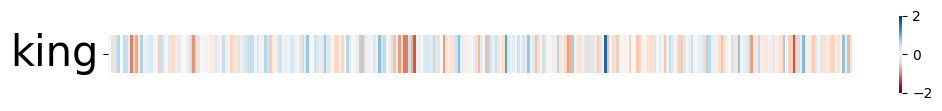

In [18]:
plot_embeddings([model['king']], ['king'])

We can also compare multiple embeddings:

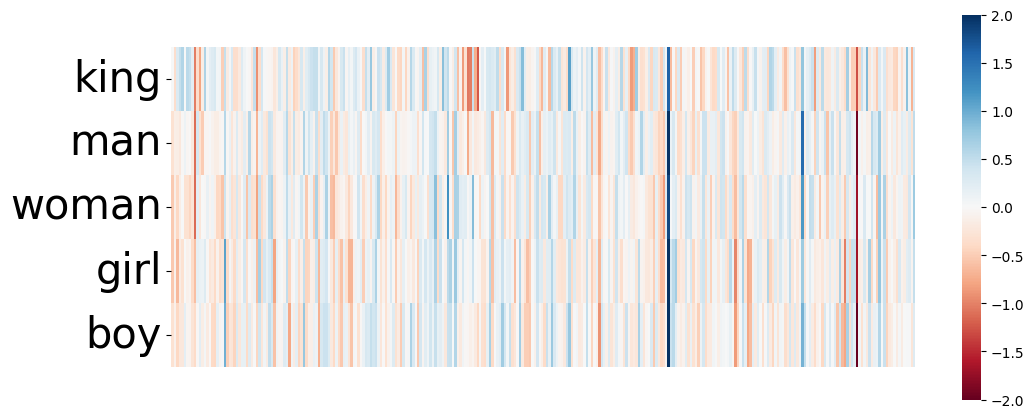

In [19]:
plot_embeddings([model['king'], model['man'], model['woman'], model['girl'], model['boy']],
              ['king', 'man', 'woman', 'girl', 'boy'])

Here's another example including a number of different concepts:

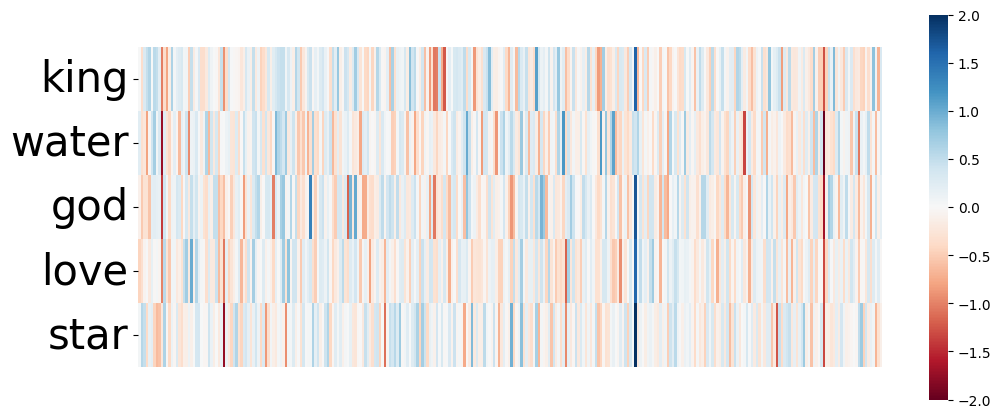

In [20]:
plot_embeddings([model['king'], model['water'], model['god'], model['love'], model['star']],
              ['king', 'water', 'god', 'love', 'star'])

# Analogies
### king - man + woman  = ?

In [37]:
model.most_similar_to_given?

Signature: model.most_similar_to_given(key1, keys_list)
Docstring: Get the `key` from `keys_list` most similar to `key1`.
File:      d:\conda\envs\pip310ecco\lib\site-packages\gensim\models\keyedvectors.py
Type:      method

In [275]:
#model.most_similar( (woman), topn=20)
model.most_similar( (king), topn=20)
#model.most_similar( (queen), topn=20)


[('Ġking', 1.00),
 ('Ġkings', 0.73),
 ('ĠKing', 0.70),
 ('Ġqueen', 0.66),
 ('King', 0.60),
 ('Ġprince', 0.59),
 ('Ġmonarch', 0.58),
 ('Ġemperor', 0.56),
 ('Ġruler', 0.55),
 ('Ġroyal', 0.54),
 ('ĠQueen', 0.54),
 ('Ġlord', 0.53),
 ('Ġpope', 0.52),
 ('Ġkingdom', 0.52),
 ('Ġprinces', 0.52),
 ('ĠKING', 0.51),
 ('Ġthrone', 0.51),
 ('Queen', 0.50),
 ('Ġlords', 0.50),
 ('Ġmonarchy', 0.50)]

In [276]:
model.most_similar(0.8*king-man+woman ,topn=20 )

[('Ġking', 0.70),
 ('Ġqueen', 0.68),
 ('Ġprincess', 0.60),
 ('ĠQueen', 0.58),
 ('Queen', 0.56),
 ('Ġwoman', 0.56),
 ('Ġkings', 0.54),
 ('Ġgoddess', 0.51),
 ('Ġqueens', 0.50),
 ('Ġgirl', 0.50),
 ('Ġwife', 0.49),
 ('Ġheroine', 0.49),
 ('Ġmonarch', 0.49),
 ('ĠPrincess', 0.49),
 ('women', 0.49),
 ('Ġwomen', 0.48),
 ('ĠKing', 0.48),
 ('Ġbride', 0.48),
 ('Woman', 0.48),
 ('ĠEmpress', 0.48)]

In [277]:
model.most_similar(king-man+woman ,topn=20 )

[('Ġking', 0.78),
 ('Ġqueen', 0.71),
 ('Ġprincess', 0.60),
 ('ĠQueen', 0.60),
 ('Ġkings', 0.59),
 ('Queen', 0.57),
 ('ĠKing', 0.54),
 ('Ġwoman', 0.54),
 ('Ġmonarch', 0.52),
 ('Ġqueens', 0.52),
 ('Ġgoddess', 0.52),
 ('Ġruler', 0.51),
 ('Ġroyal', 0.50),
 ('King', 0.50),
 ('Ġgirl', 0.49),
 ('Ġwife', 0.49),
 ('ĠPrincess', 0.49),
 ('Ġbride', 0.49),
 ('Ġpope', 0.49),
 ('Ġheroine', 0.49)]

In [278]:
model.most_similar(king+0.5*female ,topn=20 )

[('Ġking', 0.92),
 ('Ġkings', 0.70),
 ('Ġqueen', 0.70),
 ('ĠKing', 0.67),
 ('Ġmonarch', 0.60),
 ('King', 0.59),
 ('ĠQueen', 0.59),
 ('Ġprince', 0.58),
 ('Ġprincess', 0.58),
 ('Ġfemale', 0.58),
 ('Ġmale', 0.58),
 ('Ġroyal', 0.57),
 ('Ġruler', 0.57),
 ('Ġemperor', 0.56),
 ('Ġlord', 0.54),
 ('Queen', 0.54),
 ('Ġprinces', 0.54),
 ('Ġqueens', 0.54),
 ('Ġpope', 0.52),
 ('Ġkingdom', 0.52)]

In [279]:
model.most_similar(king+0.3*woman  )
model.most_similar(king+0.5*woman  )

[('Ġking', 0.93),
 ('Ġqueen', 0.71),
 ('Ġkings', 0.70),
 ('ĠKing', 0.66),
 ('Ġwoman', 0.62),
 ('Ġprince', 0.61),
 ('ĠQueen', 0.60),
 ('Ġmonarch', 0.60),
 ('Ġprincess', 0.59),
 ('King', 0.58)]

In [280]:
model.most_similar(positive=[("king", 0.7), ("woman", 0.3)]   )

[('ked', 0.66),
 ('KING', 0.57),
 ('kers', 0.57),
 ('ker', 0.54),
 ('King', 0.54),
 ('ks', 0.51),
 ('women', 0.51),
 ('ken', 0.50),
 ('kes', 0.48),
 ('Lady', 0.47)]

In [281]:
model.most_similar(positive=["king", ("woman", 0.25)]   )

[('ked', 0.68),
 ('KING', 0.58),
 ('kers', 0.57),
 ('King', 0.54),
 ('ker', 0.54),
 ('ks', 0.52),
 ('ken', 0.49),
 ('kes', 0.48),
 ('ky', 0.47),
 ('k', 0.45)]

In [282]:
model.most_similar(positive=["king", "woman"]   )

[('women', 0.64),
 ('ked', 0.59),
 ('Woman', 0.56),
 ('person', 0.55),
 ('man', 0.55),
 ('men', 0.54),
 ('girl', 0.53),
 ('people', 0.53),
 ('Lady', 0.52),
 ('Ġwoman', 0.52)]

In [283]:
model.most_similar(positive=["king", "woman"], negative=["man"], topn=20)

[('ked', 0.52),
 ('KING', 0.48),
 ('women', 0.43),
 ('Lady', 0.43),
 ('kers', 0.41),
 ('ks', 0.39),
 ('Queen', 0.39),
 ('daughter', 0.39),
 ('King', 0.38),
 ('Woman', 0.38),
 ('ă', 0.38),
 ('Ę', 0.38),
 ('Susan', 0.38),
 ('ċ', 0.38),
 ('é¾įå¥', 0.38),
 ('ĝ', 0.38),
 ('quickShip', 0.38),
 ('ú', 0.38),
 ('đ', 0.38),
 ('þ', 0.38)]

In [284]:
plot_embeddings([model['king'], 
                model['man'], 
                model['woman'],
                model['king'] - model['man'] + model['woman'],
                model['queen']],
                ['king', 'man', 'woman', 'k-m+wo', 'queen'])

KeyError: "Key 'queen' not present"

# **2019 update**: This turned out to be a misconception. The result is actually closer to "king" than it is to "queen", it's just that the code rules out the input vectors as possible outputs   #aaaa


[Fair is Better than Sensational:Man is to Doctor as Woman is to Doctor](https://arxiv.org/abs/1905.09866)

To verify, let's calculate cosine distance between the result of the analogy, and `queen`.

In [27]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
(result.shape, result, result.reshape(1, -1).shape, model['queen'].reshape(1, -1))

((300,),
 array([-0., -0.,  0.,  1.,  1., -0.,  0.,  0.,  0., -1., -1., -1.,  0.,
         1.,  0.,  0.,  0.,  0., -0., -0., -1.,  0., -0.,  0.,  0., -1.,
        -0., -0.,  0.,  0., -0., -0., -0.,  0., -1., -0., -0.,  0.,  0.,
         0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -1., -0.,  0.,
         1., -1., -0., -0.,  0.,  0.,  1.,  0.,  0., -0.,  0.,  1.,  0.,
        -1.,  0., -0.,  0.,  1.,  0., -0., -0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0., -0.,  0.,  1.,  0., -0., -0.,  1.,  0., -0., -0.,
        -1., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -1.,  1., -1.,
         0.,  0.,  0., -0.,  0.,  1.,  1.,  1.,  0.,  0.,  0., -0.,  0.,
        -1., -0., -0., -1.,  1., -1., -1., -0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1., -0.,  1.,  0., -1., -1.,  0., -0.,  1.,  0.,  1., -0.,
        -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  1., -0.,  1.,
         0., -0., -0., -0.,  1.,  1.,  0.,  0., -0.,  0., -0.,  0.,  0.,
         1., -0.,  0., -0., -0., -0.,  1.,

In [29]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
cosine_similarity(result.reshape(1, -1), model['queen'].reshape(1, -1))

array([[0.69]], dtype=float32)

Let's compare that to the distance between the result and `king`:

In [30]:
# Similarity between result and 'king'
cosine_similarity(result.reshape(1, -1), model['king'].reshape(1, -1))

array([[0.81]], dtype=float32)

So the result is more similar to king (0.8859834 similarity score) than it is to queen (0.8609581 similarity score).

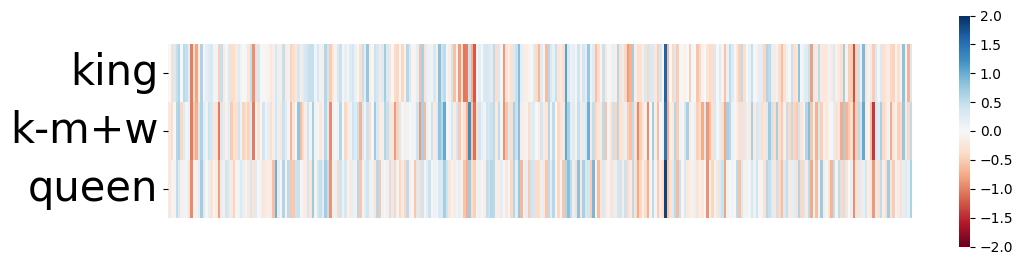

In [31]:
plot_embeddings( [model['king'],
                 result, 
                 model['queen']],
                 ['king', 'k-m+w', 'queen'])

## Exercise: doctor - man + woman = ?

In [285]:
model.most_similar( (0.7*king+0.0*woman), topn=20)
model.most_similar( (man), topn=20)
model.most_similar( (woman), topn=20)
model.most_similar( (queen), topn=20)


[('Ġqueen', 1.00),
 ('Ġqueens', 0.77),
 ('ĠQueen', 0.72),
 ('Ġking', 0.66),
 ('Queen', 0.66),
 ('Ġprincess', 0.59),
 ('Ġkings', 0.54),
 ('Ġmonarch', 0.53),
 ('Ġemperor', 0.51),
 ('Ġroyal', 0.50),
 ('Ġgoddess', 0.49),
 ('ĠDuchess', 0.49),
 ('Ġknight', 0.48),
 ('Lady', 0.48),
 ('Ġlady', 0.48),
 ('ĠEmpress', 0.47),
 ('ĠKing', 0.47),
 ('Ġprince', 0.47),
 ('Ġcolony', 0.47),
 ('Ġruler', 0.47)]

In [286]:


#orig=model['entity']
model.most_similar(man + queen-(0.7*king+0.3*woman), topn=20)
#model.most_similar(man + queen-(0.5*king+0.5*woman), topn=20)
##model.most_similar( queen-(0.99*king+0.99*woman-0.98*man), topn=20)
#model.most_similar(man + queen-(0.99*king+0.99*woman-0.98*man), topn=20)
model.most_similar(woman + queen-(0.99*king+0.99*woman-0.98*man), topn=20)
model.most_similar(orig + queen-(0.99*king+0.99*woman-0.98*man), topn=20)

model.most_similar( queen +(0.99*king+0.99*woman +0.98*man), topn=20)
model.most_similar(person + queen-(0.7*king+0.3*woman), topn=20)


model.most_similar(  female  , topn=20)

model.most_similar(  orig  , topn=20)
model.most_similar(  'the'  , topn=20)
model.most_similar(  'and'  , topn=20)
model.most_similar(  'of'  , topn=20)


model.most_similar(  (king+0.3*female), topn=20)
model.most_similar(  (king+0.5*female), topn=20)
#model.most_similar(  (king+0.7*female), topn=20)


[('Ġking', 0.92),
 ('Ġkings', 0.70),
 ('Ġqueen', 0.70),
 ('ĠKing', 0.67),
 ('Ġmonarch', 0.60),
 ('King', 0.59),
 ('ĠQueen', 0.59),
 ('Ġprince', 0.58),
 ('Ġprincess', 0.58),
 ('Ġfemale', 0.58),
 ('Ġmale', 0.58),
 ('Ġroyal', 0.57),
 ('Ġruler', 0.57),
 ('Ġemperor', 0.56),
 ('Ġlord', 0.54),
 ('Queen', 0.54),
 ('Ġprinces', 0.54),
 ('Ġqueens', 0.54),
 ('Ġpope', 0.52),
 ('Ġkingdom', 0.52)]

In [287]:
# TODO: fill-in values
model.most_similar(positive=[], negative=['king'])
model.most_similar(queen)
model.most_similar(-queen)
model.most_similar(-man, topn=20)
model.most_similar(-woman, topn=20)
model.most_similar(-king-woman, topn=20)
model.most_similar(-king+man-woman, topn=20)

model.most_similar(2*woman-man, topn=20)
model.most_similar(2*queen-man, topn=20)
model.most_similar(2*king-woman, topn=20)
model.most_similar(2*queen-woman, topn=20)
model.most_similar(1.7*king-man, topn=20)
#model.most_similar(5*queen-king, topn=20)

#model.most_similar(positive=[('french',5)], negative=['english','british'] , topn=20)
#model.most_similar(positive=[('french',2)] , topn=20)
###model.most_similar(positive=('french',2), topn=20)


femme=model['femme']
homme=model['homme']


model.most_similar(positive=[('femme',4)] ,negative=['woman','person'], topn=40)
#model.most_similar(positive=[('femme',4)] , topn=40)
model.most_similar(positive=[('femme',2.7), 'person'] ,negative=['homme','fatale'], topn=40)
model.most_similar(positive=[('femme',1.0), ('person',1.0)] ,negative=[('homme',1.0)], topn=40)
#model.most_similar(positive=['femme', 'person'] ,negative=['homme'], topn=40)

(
scipy.linalg.norm(person),
scipy.linalg.norm(femme),
scipy.linalg.norm(homme)
)
    #np.nor
model.most_similar(  person + 0.9*femme - 0.8*homme , topn=40)
model.most_similar(  1.3*person + femme - homme , topn=10)
model.most_similar(  1.3*person + femme  , topn=10)
    

KeyError: "Key 'femme' not present"

In [288]:
model.most_similar(positive=[('large',2)], negative=['small'] , topn=20)
model.most_similar(positive=[('large',2)], negative=[] , topn=20)
model.most_similar(positive=[('large',2)], topn=20)


[('Large', 0.72),
 ('small', 0.64),
 ('ĠLarge', 0.61),
 ('Ġlarge', 0.58),
 ('Small', 0.54),
 ('larg', 0.54),
 ('largest', 0.51),
 ('Ġsizable', 0.49),
 ('huge', 0.49),
 ('Ġlarger', 0.49),
 ('Ġsizeable', 0.49),
 ('ĠHuge', 0.47),
 ('sized', 0.46),
 ('ĠSmall', 0.46),
 ('Ġsmaller', 0.46),
 ('medium', 0.45),
 ('Ġsmall', 0.45),
 ('big', 0.45),
 ('massive', 0.45),
 ('Ġgigantic', 0.45)]

In [258]:
model.most_similar(positive=[('neurotic',2)], negative=['normal'] , topn=20)
model.most_similar(positive=[('neurotic',3)], negative=['normal'] , topn=20)
model.most_similar(positive=[('neurotic',4)], negative=['normal'] , topn=30)
model.most_similar(positive=[('neurotic',4)], negative=[] , topn=30)


[('narcissistic', 0.5368),
 ('obsessive', 0.5328),
 ('egotistical', 0.5303),
 ('lovable', 0.5210),
 ('manic', 0.5202),
 ('uptight', 0.5158),
 ('egomaniacal', 0.5081),
 ('hilariously', 0.5074),
 ('sociopathic', 0.5019),
 ('pushy', 0.5014),
 ('amusingly', 0.4952),
 ('snobbish', 0.4886),
 ('misanthropic', 0.4881),
 ('self-centered', 0.4860),
 ('perfectionist', 0.4859),
 ('workaholic', 0.4842),
 ('obnoxious', 0.4789),
 ('irascible', 0.4788),
 ('nerdy', 0.4769),
 ('whiny', 0.4764),
 ('hypochondriac', 0.4740),
 ('phobic', 0.4738),
 ('paranoid', 0.4716),
 ('unhinged', 0.4705),
 ('wisecracking', 0.4695),
 ('cranky', 0.4666),
 ('shtick', 0.4645),
 ('humorless', 0.4637),
 ('delusional', 0.4629),
 ('kooky', 0.4629)]

In [259]:
#model.most_similar(positive=[('woman',2)], negative=['man'] , topn=20)


### Verify: Is it, really?

In [ ]:
# TODO: do analogy algebra
result = model[''] - model[''] + model['']

# Similarity between result and 'nurse'
cosine_similarity(result.reshape(1, -1), model['nurse'].reshape(1, -1))

In [ ]:

# Similarity between result and 'doctor'
cosine_similarity(result.reshape(1, -1), model['doctor'].reshape(1, -1))

# 0.5*a + b

In [289]:
#model.most_similar(  'ant'  , topn=20)
#model.most_similar(  'dolphin'  , topn=20)
model.most_similar(  'dog'  , topn=20)
#model.most_similar(  'wolf'  , topn=20)
#model.most_similar(  'mammal'  , topn=20)
model.most_similar(  'big'  , topn=10)
#model.most_similar(  'not'  , topn=20)
#model.most_similar(  'very'  , topn=20)
model.most_similar(  'day'  , topn=10)
model.most_similar(  'work'  , topn=10)
#model.most_similar(  'Ġhouse'  , topn=60)

model.most_similar(  '0'  , topn=60)


[('1', 0.69),
 ('Ġ0', 0.67),
 ('2', 0.64),
 ('5', 0.64),
 ('3', 0.63),
 ('4', 0.62),
 ('8', 0.62),
 ('6', 0.61),
 ('9', 0.61),
 ('7', 0.60),
 ('10', 0.52),
 ('00', 0.52),
 ('04', 0.49),
 ('07', 0.49),
 ('06', 0.48),
 ('08', 0.48),
 ('02', 0.48),
 ('13', 0.48),
 ('20', 0.48),
 ('03', 0.48),
 ('030', 0.47),
 ('05', 0.47),
 ('09', 0.47),
 ('12', 0.47),
 ('029', 0.47),
 ('15', 0.47),
 ('050', 0.47),
 ('14', 0.47),
 ('023', 0.46),
 ('044', 0.46),
 ('01', 0.46),
 ('022', 0.46),
 ('16', 0.46),
 ('25', 0.46),
 ('30', 0.46),
 ('40', 0.46),
 ('11', 0.45),
 ('040', 0.45),
 ('000', 0.45),
 ('50', 0.45),
 ('028', 0.45),
 ('020', 0.45),
 ('034', 0.45),
 ('100', 0.45),
 ('026', 0.45),
 ('060', 0.45),
 ('17', 0.45),
 ('047', 0.45),
 ('027', 0.45),
 ('070', 0.45),
 ('23', 0.45),
 ('036', 0.44),
 ('33', 0.44),
 ('150', 0.44),
 ('048', 0.44),
 ('28', 0.44),
 ('075', 0.44),
 ('024', 0.44),
 ('18', 0.43),
 ('70', 0.43)]

In [110]:
model.most_similar(positive=["big", ("not", 0.5)]  , topn=20  )
model.most_similar(positive=["big", ("very", 0.5)]  , topn=20  )
model.most_similar(positive=["day", ("work", 0.5)]  , topn=20  )
model.most_similar(positive=["house", ("big", 0.5)]  , topn=20  )
model.most_similar(positive=["house", ("big", 0.9)]  , topn=20  )
model.most_similar(positive=["Ġhouse", ("Ġking", 0.5)]  , topn=40  )


[('Ġhouses', 0.69),
 ('ĠHouse', 0.63),
 ('ĠHOUSE', 0.60),
 ('House', 0.60),
 ('Ġmansion', 0.57),
 ('house', 0.56),
 ('Ġcastle', 0.54),
 ('ĠHouses', 0.54),
 ('Ġhome', 0.53),
 ('Ġpalace', 0.53),
 ('Ġkitchen', 0.51),
 ('Ġkings', 0.51),
 ('Ġapartment', 0.50),
 ('Ġhousehold', 0.50),
 ('ĠKing', 0.50),
 ('Ġhomes', 0.49),
 ('Ġqueen', 0.48),
 ('Ġprince', 0.47),
 ('houses', 0.47),
 ('Ġresidence', 0.47),
 ('home', 0.46),
 ('Ġkingdom', 0.46),
 ('Ġfamily', 0.46),
 ('Ġdoor', 0.46),
 ('Ġhomeowner', 0.46),
 ('Ġporch', 0.46),
 ('Ġhotel', 0.46),
 ('Ġwife', 0.46),
 ('Ġroom', 0.46),
 ('Ġtemple', 0.46),
 ('Ġbackyard', 0.46),
 ('Ġhousing', 0.45),
 ('Ġbasement', 0.45),
 ('Ġvillage', 0.45),
 ('Ġlords', 0.45),
 ('Ġgarage', 0.45),
 ('Ġcity', 0.45),
 ('Ġbedroom', 0.45),
 ('Ġroyal', 0.45),
 ('Ġchurch', 0.45)]

In [191]:
model.most_similar(positive=[('neurotic',4)], negative=['normal'] , topn=30)


[('narcissistic', 0.54),
 ('obsessive', 0.53),
 ('egotistical', 0.53),
 ('lovable', 0.52),
 ('manic', 0.52),
 ('uptight', 0.52),
 ('egomaniacal', 0.51),
 ('hilariously', 0.51),
 ('sociopathic', 0.50),
 ('pushy', 0.50),
 ('amusingly', 0.50),
 ('snobbish', 0.49),
 ('misanthropic', 0.49),
 ('self-centered', 0.49),
 ('perfectionist', 0.49),
 ('workaholic', 0.48),
 ('obnoxious', 0.48),
 ('irascible', 0.48),
 ('nerdy', 0.48),
 ('whiny', 0.48),
 ('hypochondriac', 0.47),
 ('phobic', 0.47),
 ('paranoid', 0.47),
 ('unhinged', 0.47),
 ('wisecracking', 0.47),
 ('cranky', 0.47),
 ('shtick', 0.46),
 ('humorless', 0.46),
 ('delusional', 0.46),
 ('kooky', 0.46)]

In [190]:

model.most_similar(  (king+0.3*female), topn=20)
model.most_similar(  (king+0.5*female), topn=20)
#model.most_similar(  (king+0.7*female), topn=20)


[('king', 0.91),
 ('queen', 0.66),
 ('monarch', 0.59),
 ('prince', 0.58),
 ('throne', 0.56),
 ('kingdom', 0.55),
 ('female', 0.54),
 ('male', 0.52),
 ('crown', 0.51),
 ('ii', 0.51),
 ('brother', 0.49),
 ('royal', 0.49),
 ('son', 0.49),
 ('iii', 0.47),
 ('kings', 0.47),
 ('emperor', 0.47),
 ('father', 0.47),
 ('named', 0.47),
 ('ruler', 0.47),
 ('reign', 0.46)]

# dijfggfghgh

In [287]:
import numpy.random
import math

In [297]:
a=np.random.randn(100,100)

In [298]:
a=a/math.sqrt(100)

In [299]:
b=(a*100).round()

In [300]:
b.max()

40.00

In [301]:
b

array([[ -1.,  -9.,  -4., ...,   8.,   7.,   5.],
       [  1.,  -4.,   4., ...,   2.,  11.,  26.],
       [-12.,  11., -11., ..., -11.,  -7.,  -2.],
       ...,
       [ -1.,   4., -10., ...,  -3.,  15., -11.],
       [ -9.,  15.,  -8., ...,  -7.,   8.,  -3.],
       [ 11.,  -3., -13., ...,  11., -20.,   6.]])

In [289]:
sum(a*a)

array([0.95, 0.84, 0.75, 0.98, 0.84, 1.14, 0.64, 0.48, 0.93, 1.06, 0.76,
       1.02, 0.67, 0.87, 1.33, 0.63, 0.62, 1.17, 0.99, 0.91, 1.24, 0.75,
       0.74, 0.72, 0.85, 0.9 , 1.09, 1.52, 1.17, 1.11])

In [284]:
np.diag(a.T @ a)

array([28.41, 25.23, 22.55, 29.4 , 25.07, 34.15, 19.24, 14.34, 27.83,
       31.76, 22.67, 30.61, 20.1 , 26.11, 40.  , 18.9 , 18.71, 34.96,
       29.71, 27.29, 37.15, 22.43, 22.24, 21.61, 25.53, 27.1 , 32.79,
       45.68, 34.96, 33.27])

In [285]:
np.diagonal(a.T @ a)

array([28.41, 25.23, 22.55, 29.4 , 25.07, 34.15, 19.24, 14.34, 27.83,
       31.76, 22.67, 30.61, 20.1 , 26.11, 40.  , 18.9 , 18.71, 34.96,
       29.71, 27.29, 37.15, 22.43, 22.24, 21.61, 25.53, 27.1 , 32.79,
       45.68, 34.96, 33.27])